# **Tesla Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**💻

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
!pip install yfinance

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/20/e7/e8f1470e28f0532c49c37618bd141eaca5c7b99f6af23fd3794d9ef1d537/yfinance-0.2.18-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/96/84cf406fe7d589f3dba9fc0f737e65985a3526c6d8c783f02d4b5a10825d/numpy-1.16.6-cp27-cp27m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bb/8f/e164d5177dd6ffc64a80d5b088f3ecd327f5765a8c2d7b867291dadb1bd1/lxml-4.9.2-cp27-cp27m-macosx_10_15_x86_64.whl
  ERROR: Could not find a version that satisfies the requirement pandas>=1.3.0 (from yfinance) (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3,

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()
from sklearn.svm import SVR
import seaborn as sns

# **Load Data into the Data Frame**

In [3]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


# **Data Preprocessing**

In [4]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0,0,0,-0.002511
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0,0,0,-0.078473
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1,0,0,-0.125683
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1,0,0,-0.160937
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,1,0,1,-0.019243


In [5]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0,0,0,-0.002511
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0,0,0,-0.078473
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1,0,0,-0.125683
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1,0,0,-0.160937
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,1,0,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,0,1,1,0.057619
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,0,1,0,0.025248
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,0,0,0,-0.005000


# **Dataset Cleaning and Null Value Testing**

In [6]:
# See how many null values in each column
dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

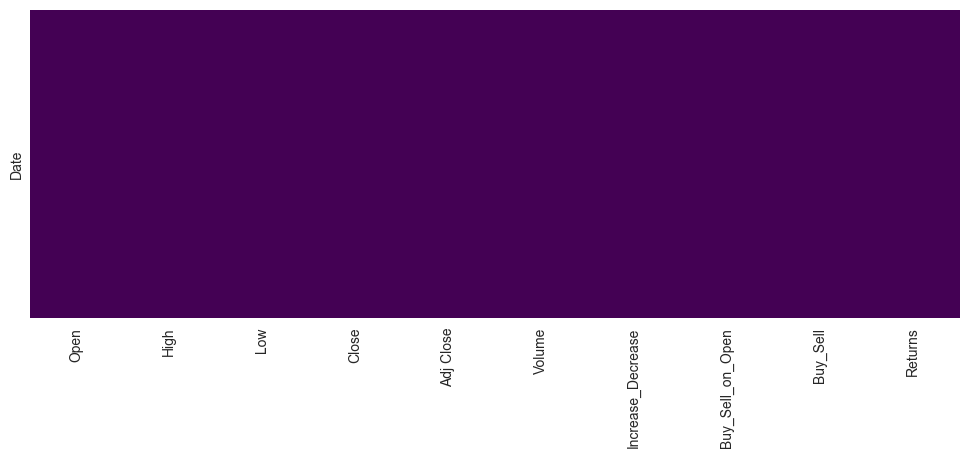

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [8]:
# see number of rows, number of columns
dataset.shape

(2897, 10)

In [9]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  28970


In [10]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [11]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2897 entries, 2010-06-30 to 2021-12-30
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2897 non-null   float64
 1   High               2897 non-null   float64
 2   Low                2897 non-null   float64
 3   Close              2897 non-null   float64
 4   Adj Close          2897 non-null   float64
 5   Volume             2897 non-null   int64  
 6   Increase_Decrease  2897 non-null   int64  
 7   Buy_Sell_on_Open   2897 non-null   int64  
 8   Buy_Sell           2897 non-null   int64  
 9   Returns            2897 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 249.0 KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'Increase_Decrease'}>,
        <Axes: title={'center': 'Buy_Sell_on_Open'}>,
        <Axes: title={'center': 'Buy_Sell'}>],
       [<Axes: title={'center': 'Returns'}>, <Axes: >, <Axes: >]],
      dtype=object)

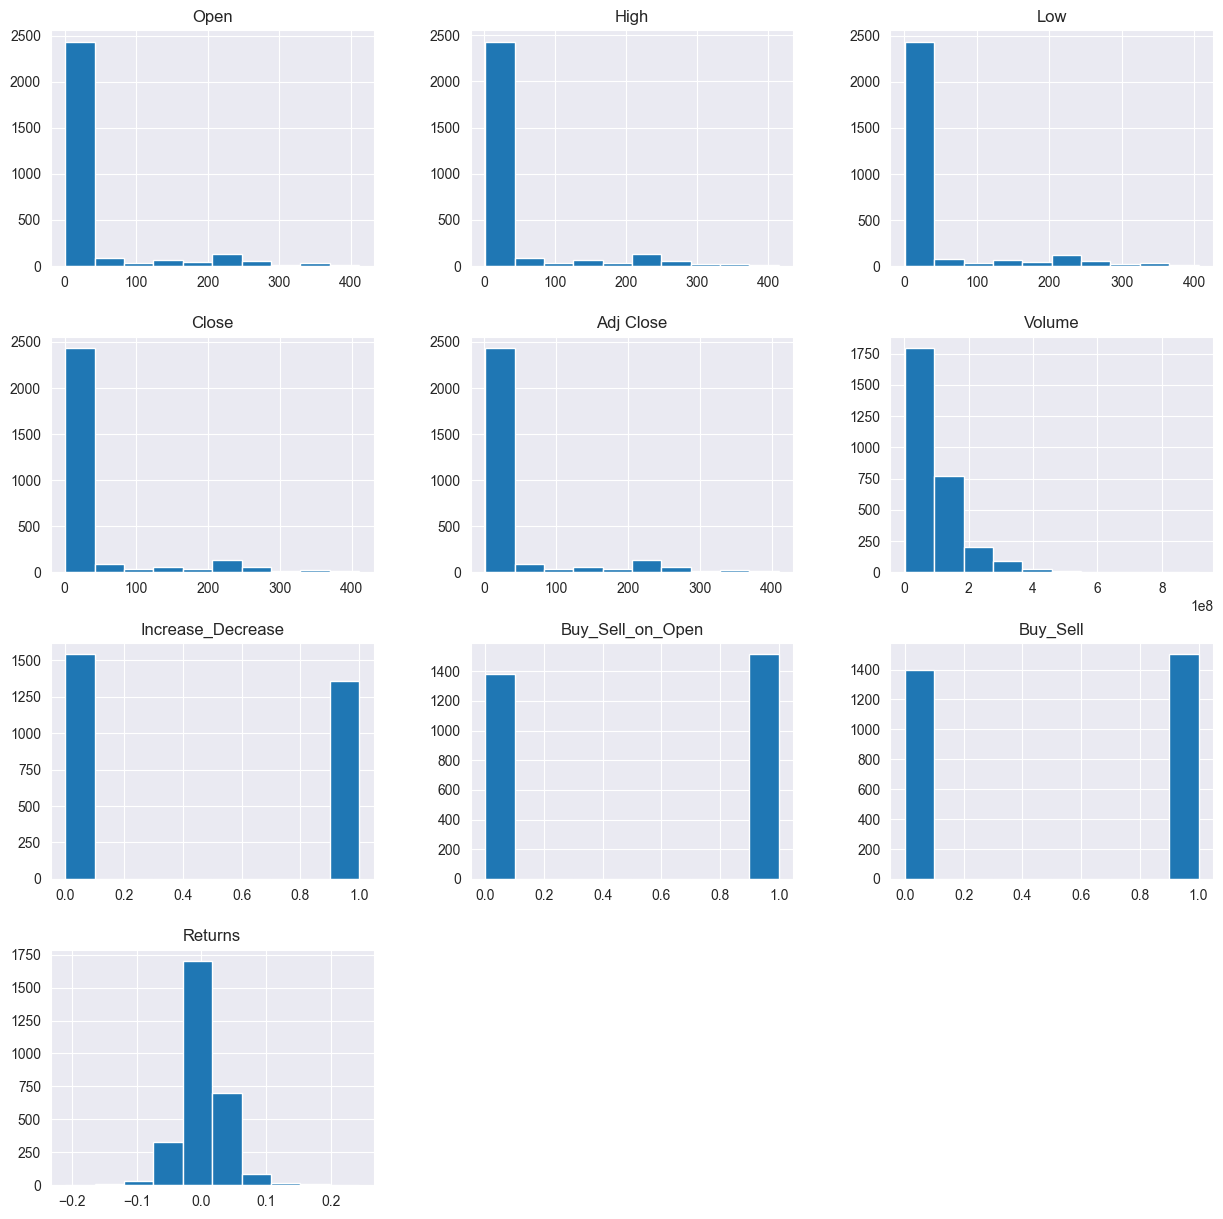

In [12]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [13]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000
mean,40.991990,41.864614,40.070170,41.026370,41.026370,9.412698e+07,0.468416,0.522610,0.518467,0.002492
std,75.216736,76.864317,73.460727,75.298005,75.298005,8.464854e+07,0.499088,0.499575,0.499745,0.035398
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,0.000000,0.000000,0.000000,-0.210628
25%,5.758000,6.064000,5.536667,5.839333,5.839333,3.852750e+07,0.000000,0.000000,0.000000,-0.014816
50%,15.381333,15.652000,15.140667,15.374000,15.374000,7.448250e+07,0.000000,1.000000,1.000000,0.001261
75%,22.210667,22.653999,21.816668,22.257999,22.257999,1.199796e+08,1.000000,1.000000,1.000000,0.019175
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,1.000000,1.000000,1.000000,0.243951


# **Define X and Y**

In [14]:
X = dataset['Open'].values.reshape(-1,1)
y = dataset['Adj Close'].values.reshape(-1,1)

In [15]:
# Split Train Data and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [16]:
# Model Training
model = SVR()
model.fit(X_train, y_train)

SVR()

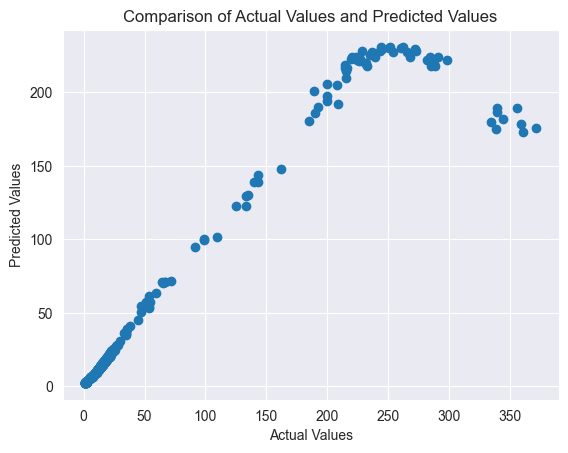

In [17]:
# Comparison of Actual Values and Predicted Values
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual Values and Predicted Values')
plt.show()

In [18]:
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df.head())
print(df.tail())

      Actual  Predicted
0  20.102667  20.843786
1   2.407333   3.214345
2   1.394667   2.486021
3   2.354667   3.208474
4   3.039333   3.633774
        Actual  Predicted
575   2.441333   3.237847
576   9.186667   9.307359
577  15.490667  15.006962
578   2.001333   2.989786
579   2.273333   3.123090


In [19]:
# Accuracy and Loss Function Values of the Model
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy Score:', model.score(X_test, y_test))

Mean Absolute Error (MAE): 5.0477942022075055
Mean Squared Error (MSE): 521.2964726095878
Root Mean Squared Error (RMSE): 22.8319178478197
Accuracy Score: 1.0
